# Package management

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("variancePartition")
BiocManager::install("GEOquery")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.16 (BiocManager 1.30.19), R 4.2.2 Patched (2022-11-10
  r83330)

Installing package(s) 'BiocVersion', 'variancePartition'

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘bitops’, ‘futile.logger’, ‘snow’, ‘BH’, ‘numDeriv’, ‘gtools’, ‘caTools’, ‘plyr’, ‘Rcpp’, ‘RUnit’, ‘clusterGeneration’, ‘mvtnorm’, ‘rbibutils’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘BiocGenerics’, ‘limma’, ‘BiocParallel’, ‘pbkrtest’, ‘lmerTest’, ‘iterators’, ‘foreach’, ‘doParallel’, ‘gplots’, ‘RhpcBLASctl’, ‘reshape2’, ‘remaCor’, ‘aod’, ‘Rdpack’, ‘lme4’, ‘Biobase’


Old packages: 'bit', 'bslib', 'data.table', 'devtools', 'digest', 'gert',
  'highr', 'isoband', 'jsonlite', 'openssl', 'pkgload', 'roxygen2', 'stringr',
  'testthat', 'tid

In [ ]:
library("variancePartition")
library("GEOquery")
library("limma")
library(ggplot2)

Loading required package: ggplot2

Loading required package: limma

Loading required package: BiocParallel


Attaching package: ‘variancePartition’


The following object is masked from ‘package:limma’:

    topTable


Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory

# Data extraction & preprocessing (ImmVar)

## Data access (GEOquery)

- cd4 - T-cells 
- cd14 - monocytes 

In [ ]:
# download supplementary files _ population info
getGEOSuppFiles("GSE56033")
getGEOSuppFiles("GSE56034")

# Get ImmVar (monocytes/ Tcells) from GEO
gse_cd4 <- getGEO("GSE56033", GSEMatrix = TRUE)
gse_cd14 <- getGEO("GSE56034", GSEMatrix = TRUE)
show(gse_cd4)
show(gse_cd14)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/content/GSE56033/GSE56033_GSM.ImmVarCD4.AA.PC12.txt.gz,8269125,FALSE,644,2023-02-17 23:02:33,2023-02-17 23:02:33,2023-02-17 23:02:32,0,0,root,root
/content/GSE56033/GSE56033_GSM.ImmVarCD4.EA.PC12.txt.gz,6076112,FALSE,644,2023-02-17 23:02:33,2023-02-17 23:02:33,2023-02-17 23:02:33,0,0,root,root
/content/GSE56033/GSE56033_GSM.ImmVarCD4.EU.PC20.txt.gz,15629828,FALSE,644,2023-02-17 23:02:33,2023-02-17 23:02:33,2023-02-17 23:02:33,0,0,root,root
/content/GSE56033/GSE56033_RAW.tar,2130739200,FALSE,644,2023-02-17 23:03:04,2023-02-17 23:03:04,2023-02-17 23:02:33,0,0,root,root


,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/content/GSE56034/GSE56034_GSM.ImmVarCD14.AA.PC14.txt.gz,8280393,FALSE,644,2023-02-17 23:03:05,2023-02-17 23:03:05,2023-02-17 23:01:06,0,0,root,root
/content/GSE56034/GSE56034_GSM.ImmVarCD14.EA.PC10.txt.gz,5817258,FALSE,644,2023-02-17 23:03:05,2023-02-17 23:03:05,2023-02-17 23:01:06,0,0,root,root
/content/GSE56034/GSE56034_GSM.ImmVarCD14.EU.PC20.txt.gz,15524046,FALSE,644,2023-02-17 23:03:06,2023-02-17 23:03:06,2023-02-17 23:01:06,0,0,root,root
/content/GSE56034/GSE56034_RAW.tar,2130022400,FALSE,644,2023-02-17 23:03:38,2023-02-17 23:03:38,2023-02-17 23:01:07,0,0,root,root


Found 1 file(s)

GSE56033_series_matrix.txt.gz

Using locally cached version: /tmp/Rtmp2aXf6v/GSE56033_series_matrix.txt.gz

Using locally cached version of GPL6244 found here:
/tmp/Rtmp2aXf6v/GPL6244.soft.gz 

Found 1 file(s)

GSE56034_series_matrix.txt.gz

Using locally cached version: /tmp/Rtmp2aXf6v/GSE56034_series_matrix.txt.gz

Using locally cached version of GPL6244 found here:
/tmp/Rtmp2aXf6v/GPL6244.soft.gz 



$GSE56033_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 21727 features, 499 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1350856 GSM1350857 ... GSM1355864 (499 total)
  varLabels: title geo_accession ... Sex:ch1 (48 total)
  varMetadata: labelDescription
featureData
  featureNames: 7896740 7896742 ... 8180179 (21727 total)
  fvarLabels: ID GB_LIST ... category (12 total)
  fvarMetadata: Column Description labelDescription
experimentData: use 'experimentData(object)'
  pubMedIds: 24786080
31541153 
Annotation: GPL6244 

$GSE56034_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 21727 features, 485 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1351309 GSM1351310 ... GSM1355987 (485 total)
  varLabels: title geo_accession ... Sex:ch1 (46 total)
  varMetadata: labelDescription
featureData
  featureNames: 7896740 7896742 ... 8180179 (21727 total)
  fvarLabels: 

In [ ]:
# extract individual GSM entries 
gsmList_cd4 <-rownames(pData(gse_cd4[[1]])[2])
gsmList_cd14 <-rownames(pData(gse_cd14[[1]])[2])

# sanity check - number of samples 
# CD4 - 499
# CD14 - 485
cat("CD4 sample size", length(gsmList_cd4), "\n")
cat("CD14 sample size", length(gsmList_cd14))

CD4 sample size 499 
CD14 sample size 485

## Data preprocessing
- change format to match Variaton Partition input format
- check missing values
- make string variables consistent (metadata)
- sanity checks 

In [ ]:
# Data preprocessing functions 

# ExprMeta - extract gene expression and metadata dataframe from a list of GSM
# input - gsmList 
# return - expression_df, metadata_df
# required GEOquery

ExprMeta <- function(gsmList) {
  
  result_expr <- data.frame()
  result_meta <- data.frame()

  for (i in 1:length(gsmList))
  {
    # get GSM
    gsm <- getGEO(gsmList[i])

    # expr data 
    expr_df <- data.frame(Table(gsm))
    colnames(expr_df)[2] = gsmList[i]

    if (i==1) {
      result_expr <- expr_df
    } else {
      result_expr <- merge(result_expr, expr_df, by="ID_REF", all=TRUE, no.dups=FALSE)
    }

    # metadata
    # extract meta data from gsm 
    df <- data.frame(attributes(gsm)$header$characteristics_ch1)

    #extract individual ID
    ID <- gsub(" ", "",attributes(gsm)$header$title)
    ID <- gsub("\\..*", "",ID)

    meta_df <- data.frame(apply(df, 1, function(x) gsub(".*:","",x)))
    colnames(meta_df) <- gsmList[i]
    row.names(meta_df) <- apply(df, 1, function(x) gsub(":.*","",x))
    meta_df <- t(meta_df)
    meta_df <- cbind(meta_df, ID)

    if (i==1)
    {
      result_meta <- meta_df
    } else {
      result_meta <- rbind(result_meta, meta_df)
    }

  }

  return(list(result_expr, result_meta))
  
}

# CheckNa - to check missing values 
# input - matrix 
# output - num na values
CheckNa <- function(mat) {
  sum(is.na(mat))
}

In [ ]:
# extract matrix of gene expr and metadata 
# cd4
cd4 <- ExprMeta(gsmList_cd4)
cd4_expr <- cd4[[1]]
cd4_meta <- cd4[[2]]

cd14 <- ExprMeta(gsmList_cd14)
cd14_expr <- cd14[[1]]
cd14_meta <- cd14[[2]]

# sanity check - dimensions
cat(dim(cd4_expr), dim(cd4_meta), "\n")
cat(dim(cd14_expr), dim(cd14_meta))

# check missing values
cat("num missing values", CheckNa(cd4_expr), CheckNa(cd4_meta), CheckNa(cd14_expr), CheckNa(cd14_meta))

In [ ]:
head(cd4_meta)
head(cd14_meta)

,age (yrs),gender,cell type,batch,inclusion markers,exclusion markers,phenotype markers,separation method,ID
GSM1350856,30,female,T4 Naive cells from human peripheral blood mononuclear cells (PBMCs),1,CD3+ CD4+ CD62L+,CD14- CD8- CD25-,CD3+ CD14- CD4+ CD8- CD62L+ CD25-,Aria Sorter,IGTB10
GSM1350857,30,female,T4 Naive cells from human peripheral blood mononuclear cells (PBMCs),1,CD3+ CD4+ CD62L+,CD14- CD8- CD25-,CD3+ CD14- CD4+ CD8- CD62L+ CD25-,Aria Sorter,IGTB10
GSM1350858,47,male,T4 Naive cells from human peripheral blood mononuclear cells (PBMCs),1,CD3+ CD4+ CD62L+,CD14- CD8- CD25-,CD3+ CD14- CD4+ CD8- CD62L+ CD25-,Aria Sorter,IGTB100
GSM1350859,46,female,T4 Naive cells from human peripheral blood mononuclear cells (PBMCs),4,CD3+ CD4+ CD62L+,CD14- CD8- CD25-,CD3+ CD14- CD4+ CD8- CD62L+ CD25-,Aria Sorter,IGTB1004
GSM1350860,42,male,T4 Naive cells from human peripheral blood mononuclear cells (PBMCs),1,CD3+ CD4+ CD62L+,CD14- CD8- CD25-,CD3+ CD14- CD4+ CD8- CD62L+ CD25-,Aria Sorter,IGTB1007
GSM1350861,27,female,T4 Naive cells from human peripheral blood mononuclear cells (PBMCs),6,CD3+ CD4+ CD62L+,CD14- CD8- CD25-,CD3+ CD14- CD4+ CD8- CD62L+ CD25-,Aria Sorter,IGTB1009


,age (yrs),Sex,cell type,batch,inclusion markers,exclusion markers,phenotype markers,separation method,ID
GSM1351309,32,Female,monocytes from peripheral blood mononuclear cells (PBMCs),1,CD14+,CD3- CD16-,CD3- CD14+ CD16-,Aria Sorter,IGTB3
GSM1351310,54,Female,monocytes from peripheral blood mononuclear cells (PBMCs),5,CD14+,CD3- CD16-,CD3- CD14+ CD16-,Aria Sorter,IGTB4
GSM1351311,54,Female,monocytes from peripheral blood mononuclear cells (PBMCs),5,CD14+,CD3- CD16-,CD3- CD14+ CD16-,Aria Sorter,IGTB4
GSM1351312,53,Female,monocytes from peripheral blood mononuclear cells (PBMCs),1,CD14+,CD3- CD16-,CD3- CD14+ CD16-,Aria Sorter,IGTB4
GSM1351313,34,Female,monocytes from peripheral blood mononuclear cells (PBMCs),1,CD14+,CD3- CD16-,CD3- CD14+ CD16-,Aria Sorter,IGTB8
GSM1351314,30,Female,monocytes from peripheral blood mononuclear cells (PBMCs),1,CD14+,CD3- CD16-,CD3- CD14+ CD16-,Aria Sorter,IGTB10


In [ ]:
# sanity check string data - example possible case mismatch
# examine range of unique values for each category
for (i in 1:8){
  print(unique(cd14_meta[,i]))
}

for (i in 1:8){
  print(unique(cd4_meta[,i]))
}

 [1] " 32" " 54" " 53" " 34" " 30" " 24" " 21" " 28" " 25" " 29" " 31" " 44"
[13] " 38" " 47" " 51" " 20" " 27" " 49" " 26" " 37" " 22" " 48" " 36" " 45"
[25] " 39" " 23" " 35" " 40" " 50" " 42" " 33" " 46" " 19" " 43" " 52" " 41"
[37] " 18"
[1] " Female" " Male"  
[1] " monocytes from peripheral blood mononuclear cells (PBMCs)"
[1] " 1" " 5" " 3" " 2" " 6" " 4"
[1] " CD14+"
[1] " CD3- CD16-"
[1] " CD3- CD14+ CD16-"
[1] " Aria Sorter"
 [1] " 30" " 47" " 46" " 42" " 27" " 20" " 49" " 23" " 36" " 43" " 40" " 19"
[13] " 41" " 38" " 44" " 25" " 21" " 45" " 50" " 37" " 29" " 48" " 28" " 34"
[25] " 26" " 51" " 24" " 22" " 32" " 35" " 18" " 31" " 33" " 56" " 9"  " 39"
[37] " 53" " 54" " 52"
[1] " female" " male"   " Male"   " Female"
[1] " T4 Naive cells from human peripheral blood mononuclear cells (PBMCs)"
[1] " 1" " 4" " 6" " 2" " 3" " 5"
[1] " CD3+ CD4+ CD62L+"
[1] " CD14- CD8- CD25-"
[1] " CD3+ CD14- CD4+ CD8- CD62L+ CD25-"
[1] " Aria Sorter"


In [ ]:
# range of gene expression matrix values
range(cd4_expr)
range(cd14_expr)

[1]   -1359.045 8180179.000

[1]    -424.499 8180179.000

In [ ]:
# change case mistmatch for meta 
cd4_meta <- tolower(cd4_meta)
cd14_meta <- tolower(cd14_meta)

# sanity check - check if mistmatch resolved
for (i in 1:8){
  print(unique(cd14_meta[,i]))
}

for (i in 1:8){
  print(unique(cd4_meta[,i]))
}

 [1] " 32" " 54" " 53" " 34" " 30" " 24" " 21" " 28" " 25" " 29" " 31" " 44"
[13] " 38" " 47" " 51" " 20" " 27" " 49" " 26" " 37" " 22" " 48" " 36" " 45"
[25] " 39" " 23" " 35" " 40" " 50" " 42" " 33" " 46" " 19" " 43" " 52" " 41"
[37] " 18"
[1] " female" " male"  
[1] " monocytes from peripheral blood mononuclear cells (pbmcs)"
[1] " 1" " 5" " 3" " 2" " 6" " 4"
[1] " cd14+"
[1] " cd3- cd16-"
[1] " cd3- cd14+ cd16-"
[1] " aria sorter"
 [1] " 30" " 47" " 46" " 42" " 27" " 20" " 49" " 23" " 36" " 43" " 40" " 19"
[13] " 41" " 38" " 44" " 25" " 21" " 45" " 50" " 37" " 29" " 48" " 28" " 34"
[25] " 26" " 51" " 24" " 22" " 32" " 35" " 18" " 31" " 33" " 56" " 9"  " 39"
[37] " 53" " 54" " 52"
[1] " female" " male"  
[1] " t4 naive cells from human peripheral blood mononuclear cells (pbmcs)"
[1] " 1" " 4" " 6" " 2" " 3" " 5"
[1] " cd3+ cd4+ cd62l+"
[1] " cd14- cd8- cd25-"
[1] " cd3+ cd14- cd4+ cd8- cd62l+ cd25-"
[1] " aria sorter"


In [ ]:
# check categorical variable names of two datasets 
colnames(cd4_meta)
colnames(cd14_meta)

# change column name so both datasets match
colnames(cd14_meta) <- colnames(cd4_meta)

#sanity check 
colnames(cd4_meta)
colnames(cd14_meta)


[1] "age (yrs)"         "gender"            "cell type"        
[4] "batch"             "inclusion markers" "exclusion markers"
[7] "phenotype markers" "separation method" "ID"

[1] "age (yrs)"         "Sex"               "cell type"        
[4] "batch"             "inclusion markers" "exclusion markers"
[7] "phenotype markers" "separation method" "ID"

[1] "age (yrs)"         "gender"            "cell type"        
[4] "batch"             "inclusion markers" "exclusion markers"
[7] "phenotype markers" "separation method" "ID"

[1] "age (yrs)"         "gender"            "cell type"        
[4] "batch"             "inclusion markers" "exclusion markers"
[7] "phenotype markers" "separation method" "ID"

In [ ]:
# check that gene ID's are identical between two datasets
(nrow(cd4_expr))
sum(rownames(cd4_expr) == rownames(cd14_expr))

[1] 21727

[1] 21727

In [ ]:
# merge to datasets 
# check if properly merged - dimension loss check 
expr_matrix <- cbind(cd4_expr, cd14_expr)
meta_matrix <- rbind(cd4_meta, cd14_meta)

# change format to match var partition input 
expr <- expr_matrix[,-1]
rownames(expr) <- expr_matrix[,1]
expr_matrix <- data.matrix(expr)

expr_matrix = subset(expr_matrix, select = -ID_REF )
setdiff(colnames(expr_matrix), rownames(meta_matrix))

dim(expr_matrix)
dim(meta_matrix)

character(0)

[1] 21727   984

[1] 984   9

In [ ]:
# remove redundant features from metadata
meta_matrix = subset(meta_matrix, select = c('age (yrs)','gender','cell type','batch','ID'))

# rewrite colnames of metadata
colnames(meta_matrix) <- c("age", "gender", "cell_type", "batch","individual")
dim(meta_matrix)
meta_matrix <- data.frame(meta_matrix)

[1] 984   5

In [ ]:
meta_matrix

,age,gender,cell_type,batch,individual
,<chr>,<chr>,<chr>,<chr>,<chr>
GSM1350856,30,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb10
GSM1350857,30,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb10
GSM1350858,47,male,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb100
GSM1350859,46,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),4,igtb1004
GSM1350860,42,male,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb1007
GSM1350861,27,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),6,igtb1009
GSM1350862,20,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb1016
GSM1350863,49,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb1018
GSM1350864,23,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb1020


In [ ]:
# match format input of variation partition
ID <- rownames(meta_matrix)
meta_matrix <- cbind(ID, meta_matrix)


meta_matrix$ID <- as.factor(meta_matrix$ID)
meta_matrix$age <- as.integer(meta_matrix$age)
meta_matrix$gender <- as.factor(meta_matrix$gender)
meta_matrix$cell_type <- as.factor(meta_matrix$cell_type)
meta_matrix$batch <- as.factor(meta_matrix$batch)
meta_matrix$individual <- as.factor(meta_matrix$individual)

In [ ]:
head(meta_matrix)

,ID,age,gender,cell_type,batch,individual
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
GSM1350856,GSM1350856,30,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb10
GSM1350857,GSM1350857,30,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb10
GSM1350858,GSM1350858,47,male,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb100
GSM1350859,GSM1350859,46,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),4,igtb1004
GSM1350860,GSM1350860,42,male,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),1,igtb1007
GSM1350861,GSM1350861,27,female,t4 naive cells from human peripheral blood mononuclear cells (pbmcs),6,igtb1009


# Variation Partition 

In [ ]:
# variable/ column names 
colnames(meta_matrix)

[1] "ID"         "age"        "gender"     "cell_type"  "batch"     
[6] "individual"

In [ ]:
# subtract the effects of batch with limma - method 1 
fit <- lmFit(expr_matrix, model.matrix(~batch, meta_matrix))
res <- residuals(fit, expr_matrix)

# partitin variance with the remaining residual without batch
form <-  ~ age + (1|gender) + (1|cell_type) + (1|individual)
varPartResid <- fitExtractVarPartModel(res, form, meta_matrix)

Dividing work into 100 chunks...


Total:2204 s



In [ ]:
# examine output structure - each row should sum to 1
head(data.frame(varPartResid))

write.csv(data.frame(varPartResid), "/content/varPartResid.csv")

,cell_type,gender,individual,age,Residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7896740,0.051421269,2.789072e-03,0.09527727,0.0006889381,0.8498235
7896742,0.338110417,0.000000e+00,0.18269662,0.0005109159,0.4786821
7896744,0.003359053,2.731338e-06,0.11422617,0.0007692933,0.8816428
7896750,0.000000000,0.000000e+00,0.11325822,0.0002595351,0.8864822
7896754,0.275511240,0.000000e+00,0.21323000,0.0005135548,0.5107452
7896756,0.467265610,6.082497e-03,0.07523141,0.0013573172,0.4500632


Warning message in canCorPairs(form, meta_matrix):
“Regression model may be problematic.
High colinearity between variables:
  individual and gender”


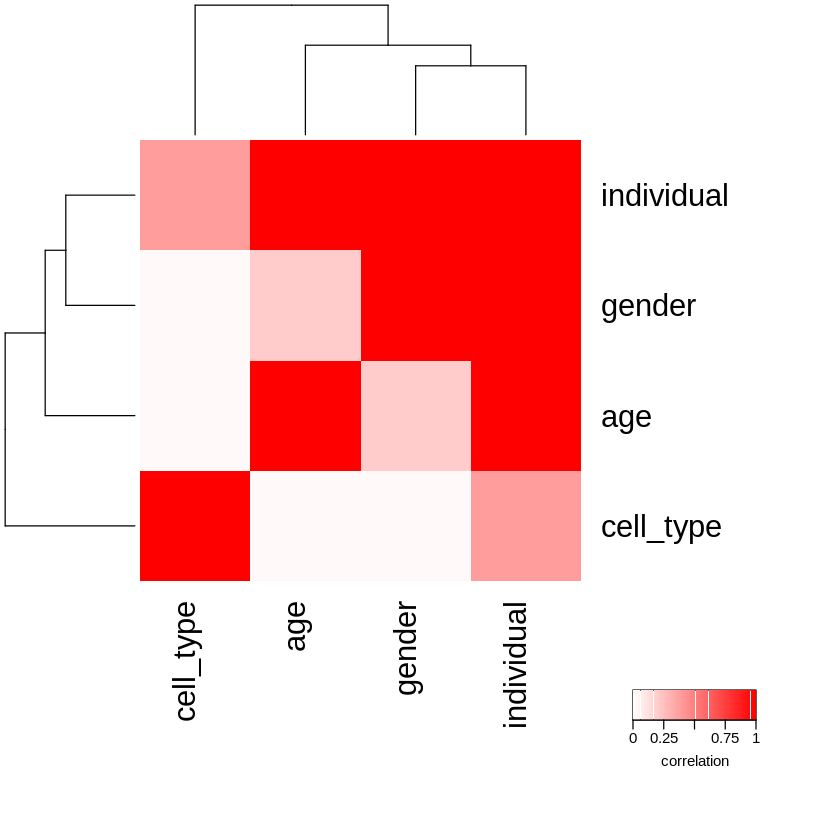

In [ ]:
# correlation between all pairs of variables 
form <- ~ individual + cell_type + age + gender
C = canCorPairs(form, meta_matrix)

plotCorrMatrix(C)

In [ ]:
# find the proportional of total variance explained by each column/variable
ct <- sum(varPartResid$cell_type)
indi <- sum(varPartResid$gender, varPartResid$individual, varPartResid$age)
r <- sum(varPartResid$Residuals)

total <- sum(ct, indi, r)

cat("fraction explained by cell type: ", ct/total, "\n")
cat("fraction exlained by individual: ", indi/total, "\n")
cat("fraction explained by residuals: ", r/total, "\n")

fraction explained by cell type:  0.4512524 
fraction exlained by individual:  0.08530131 
fraction explained by residuals:  0.4634462 


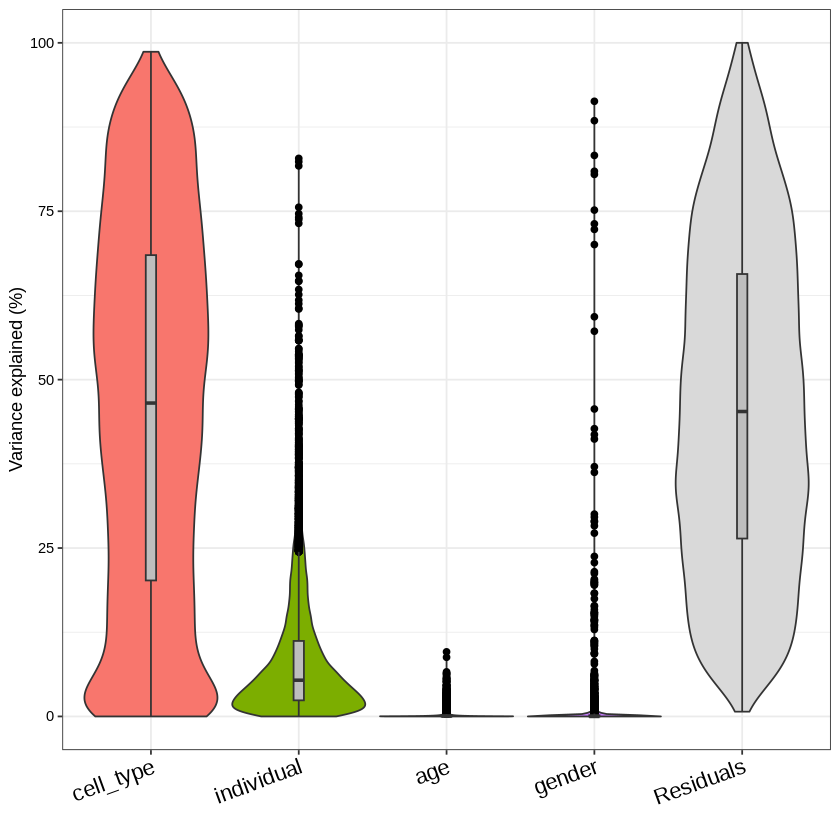

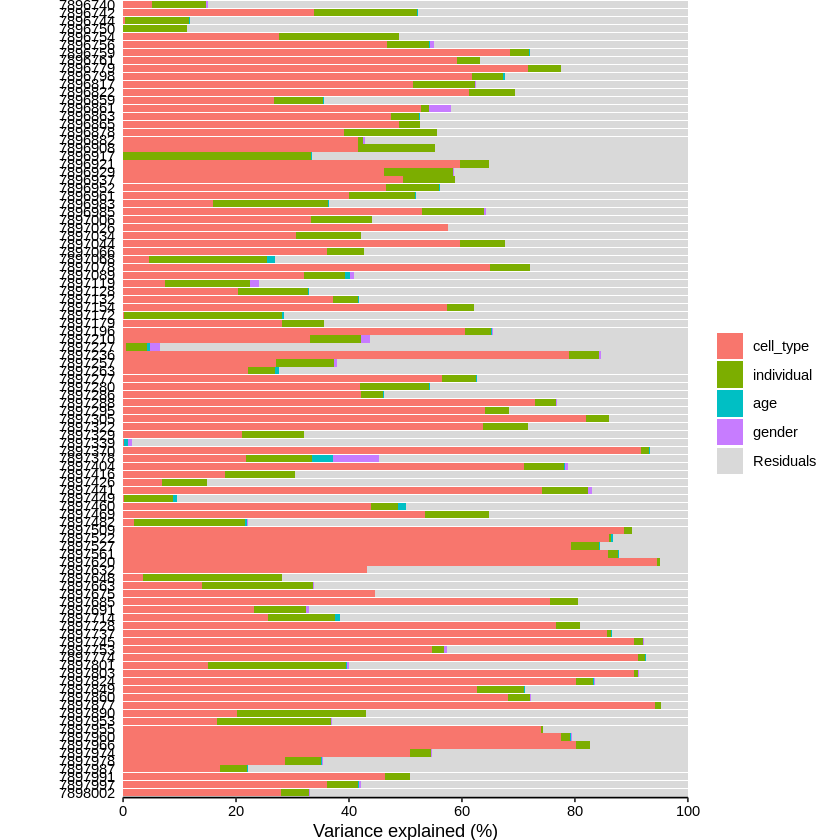

In [ ]:
# sort variables (columns) by median fraction of variance explaned
p <- sortCols( varPartResid )

# plot variance fraction for the first 100 genes
plotVarPart( vp )
plotPercentBars( vp[1:100,] )


In [ ]:
# summarize variance explained by each column/ variable 
print("cell_type")
summary(varPartResid$cell_type)

print("individual")
summary(varPartResid$individual)

print("age")
summary(varPartResid$age)

print("gender")
summary(varPartResid$gender)

[1] "cell_type"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2019  0.4652  0.4513  0.6848  0.9867 

[1] "individual"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02390 0.05380 0.08105 0.11208 0.82844 

[1] "age"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 9.587e-05 4.528e-04 1.600e-03 1.449e-03 9.590e-02 

[1] "gender"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000001 0.0026500 0.0016746 0.9131837 

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


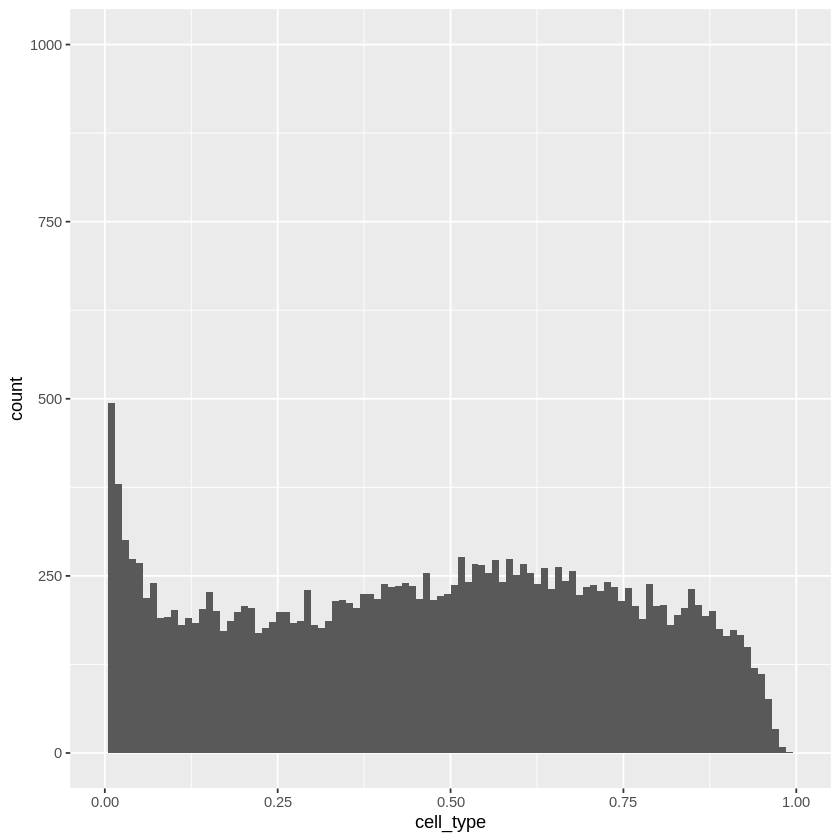

In [ ]:
# cell_type 
ggplot(varPartResid, aes(x=cell_type)) + geom_histogram(bins = 100) + xlim(0, 1) +ylim(0,1000)

Warning message:
“Removed 7 rows containing missing values (`geom_bar()`).”


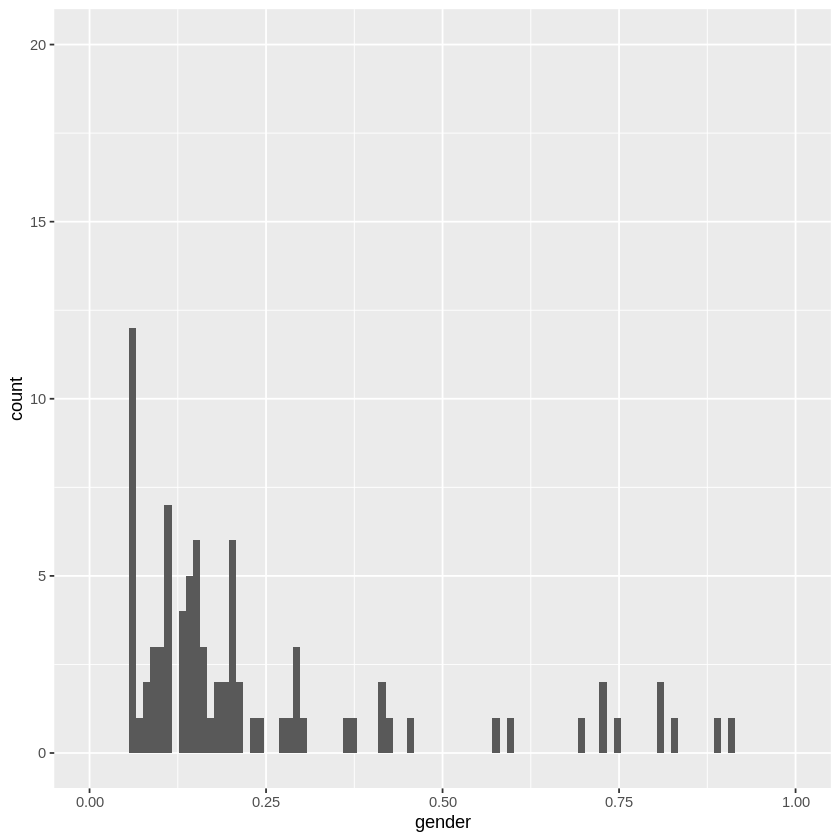

In [ ]:
# gender
ggplot(varPartResid, aes(x=gender)) + geom_histogram(bins= 100) + xlim(0, 1) +ylim(0,20)

Warning message:
“Removed 7 rows containing missing values (`geom_bar()`).”


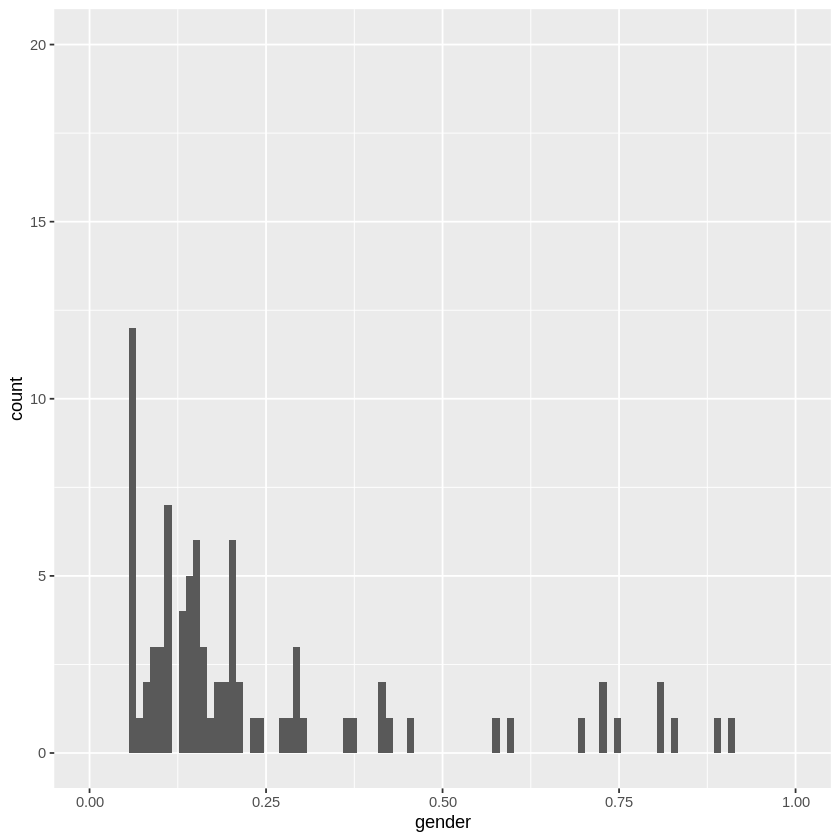

In [ ]:
# age
ggplot(varPartResid, aes(x=gender)) + geom_histogram(bins= 100) + xlim(0, 1) +ylim(0,20)

Warning message:
“Removed 29 rows containing missing values (`geom_bar()`).”


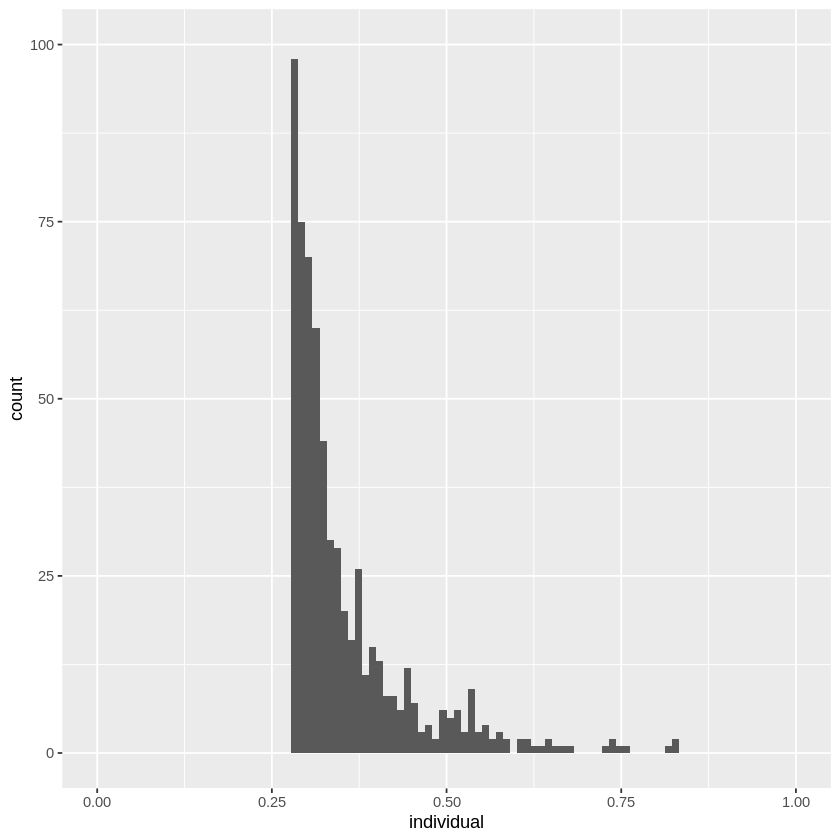

In [ ]:
# individual
ggplot(varPartResid, aes(x=individual)) + geom_histogram(bins = 100) + xlim(0, 1) +ylim(0,100)

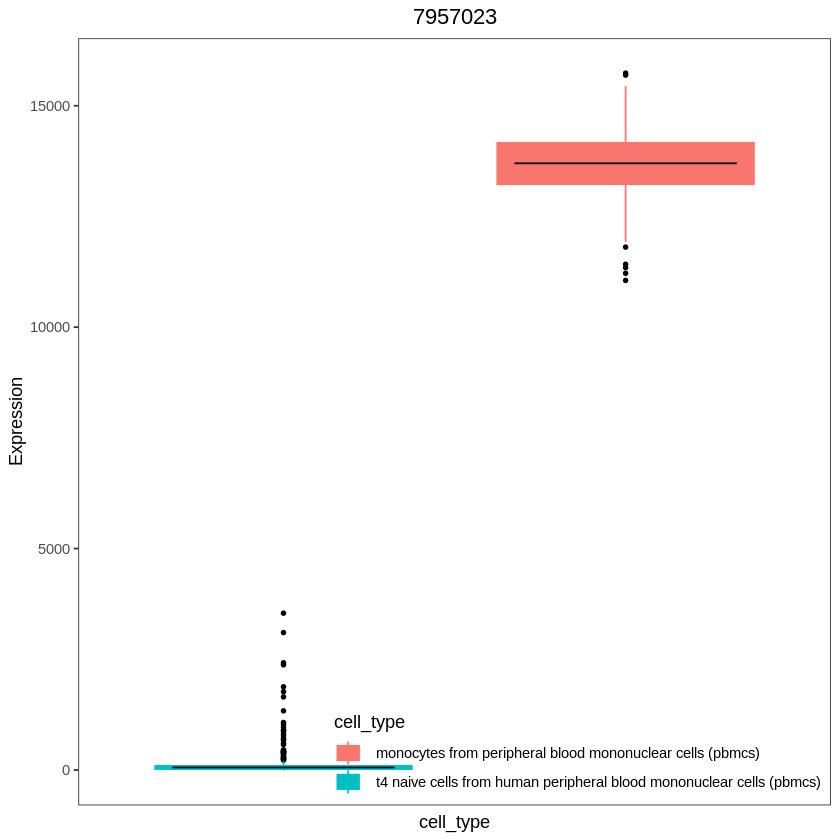

In [ ]:
# get genes with the highest variation accross cell_types
i <- which.max(varPartResid$cell_type)
GE <- data.frame(Expression = expr_matrix[i,], cell_type = meta_matrix$cell_type)

# plot the gene with highest variatio across 
plotStratify(Expression~ cell_type, GE, main=rownames(expr_matrix)[i])